Model Accuracy with PCA-enhanced KNN: 83.70%
         PC1        PC2       PC3        PC4        PC5       PC6       PC7  \
0  -1.259466 -21.274883  9.463055 -13.014189   7.128823  7.440659 -3.252837   
1   7.957611  20.768699 -4.439506  14.893664  -5.896249  6.485622 -2.126228   
2   6.991923   9.955986 -2.958558  12.288302  18.126023  4.507664 -1.843122   
3 -15.906105  -3.332464 -9.824372  12.275838  -6.965169 -1.089483  1.042085   
4  23.306867  -4.269061  5.675129  13.851524   0.358124  2.857574  0.720497   

         PC8       PC9       PC10  ...      PC21      PC22      PC23  \
0  -2.553470  0.581842  -3.625697  ...  2.680850  1.009450  2.009703   
1   4.615936 -3.587450   1.074705  ... -1.205777 -4.838902  0.860251   
2  16.415200 -0.719233  -4.255805  ...  4.951115 -2.465109  5.999388   
3 -10.973556  3.259735  -6.498753  ...  0.269413  3.623236  2.538124   
4 -13.041696  3.835413 -13.414164  ...  0.206830  5.740696 -7.611946   

       PC24      PC25      PC26      PC27      

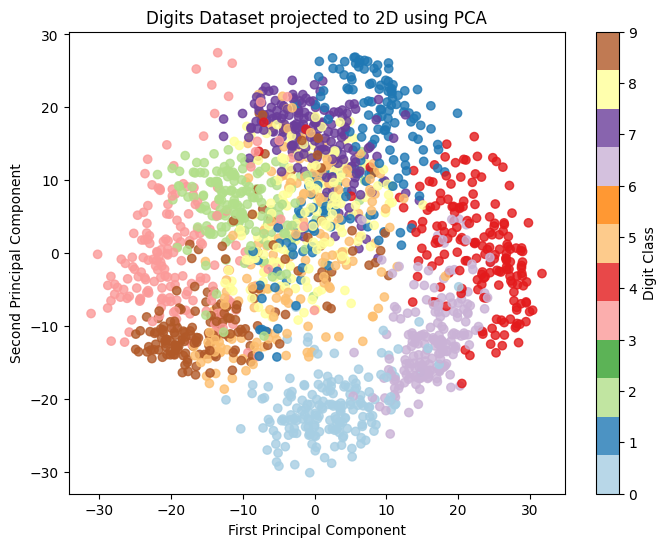

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# 1. Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Build a pipeline for scaling, PCA, and KNN
# Using a pipeline ensures the same transformations are applied consistently
# to both training and test data.
# We choose to reduce the dimensions to 30 principal components
# (a good balance of variance explained vs. dimensionality reduction)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=5)), # Reduce to 30 components
    ('knn', KNeighborsClassifier(n_neighbors=2)) # KNN classifier
])

# 3. Train the model (fit the pipeline to the training data)
# The fit method handles scaling and PCA fitting/transforming internally
pipeline.fit(X_train, y_train)

# 4. Evaluate the model on the test data
# The score method handles the transformation of the test data internally before predicting
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy with PCA-enhanced KNN: {accuracy*100:.2f}%")

# 5. Optional: Visualize the digits in 2D space using PCA
pca_2d = PCA(n_components=30)
# Transform the entire dataset for visualization purposes
X_projected = pca_2d.fit_transform(X)

print(pd.DataFrame(X_projected, columns=[f'PC{i+1}' for i in range(30)]).head())

plt.figure(figsize=(8, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap='Paired', alpha=0.8)
plt.colorbar(label='Digit Class')
plt.title('Digits Dataset projected to 2D using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()